In [1]:
#%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from math import cos, sin, pi
import math
from statistics import mean
import os.path

shape_size = 48

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
dim = 200

def init_model():
    model = Sequential()
    model.add(Dense(200, input_dim=dim))
    model.add(Activation('relu'))
    model.add(Dense(150))
    #model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(100))
    #model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(80))
    #model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(50))
    model.add(Activation('relu'))
    model.add(Dense(20))
    model.add(Dropout(0.5))
#     model.add(Activation('relu'))
#     model.add(Dense(120))
#     #model.add(Dropout(0.5))
#     model.add(Activation('relu'))
#     model.add(Dense(100))
#     #model.add(Dropout(0.5))
#     model.add(Activation('relu'))
#     model.add(Dense(80))
#     model.add(Activation('relu'))
#     model.add(Dense(20))
#     model.add(Activation('relu'))
    model.add(Dense(6))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.01)
              #metrics=['accuracy']
                 )
    return model

Using TensorFlow backend.


In [2]:
data_size = 0
dummy1 = [0]*200
dummy2 = [0]*6
SP = np.array(np.reshape(dummy1, (1, 200)))
SH = np.array(np.reshape(dummy2, (1, 6)))
for i in range(2, 65):
    path = 'meep_code/data/DATA'+str(i)
    if not os.path.exists(path):
        #miss.append(i)
        print('Missing batch:' + str(i))
        continue
        
    files = next(os.walk(path))[2] #dir is your directory path as string]
    num_data = len(files)
    data_size += num_data
    skip = []
    
    coordinates = np.genfromtxt('meep_code/data/DATA'+str(i)+'_sh.txt')
    xc, yc = coordinates[:, 0], coordinates[:, 1]
    xc = np.reshape(xc, (num_data, shape_size))
    yc = np.reshape(yc, (num_data, shape_size))
    
    for j in range(num_data):
        tmp = np.genfromtxt(path+'/'+'DATA'+str(i)+'_sp'+str(j)+'.txt')
        valid = True
        for q in range(200):
            if math.isnan(float(tmp[q])):
                print('Batch '+str(i)+'\tsample '+str(j)+' has NAN value')
                valid = False
                break
            if tmp[q] > 3:
                print('Batch '+str(i)+'\tsample '+str(j)+' has extreme value')
                valid = False
                break
        if not valid:
            #skip.append(j)
            continue
        SP = np.concatenate((SP, np.reshape(tmp, (1, 200))))
        tmp = []
        for q in range(6):
            tmp.append(math.sqrt(xc[j][q]**2 + yc[j][q]**2))
        SH = np.concatenate((SH, np.reshape(np.array(tmp), (1, 6))))
        #print(SP.shape)
    #print(files)
#     coordinates = np.genfromtxt('meep_code/data/DATA'+str(i)+'_sh.txt')
#     xc, yc = coordinates[:, 0], coordinates[:, 1]
#     xc = np.reshape(xc, (num_data, shape_size))
#     yc = np.reshape(yc, (num_data, shape_size))
#     for j in range(num_data):
#         if j in skip:
#             continue
#         tmp = []
#         for q in range(6):
#             tmp.append(math.sqrt(xc[j][q]**2 + yc[j][q]**2))
#         SH = np.concatenate((SH, np.reshape(np.array(tmp), (1, 6))))
    print('Batch '+str(i)+' has \t'+str(num_data)) 
#     freq = np.genfromtxt('meep_code/data/freq.txt')   
#     for j in range(num_data):
#         print(j)
#         plt.ylim(0, 1.1)
#         plt.plot(freq, SP[data_size - num_data + j + 1])
#         plt.show()
#         plt.axis('equal')
#         plt.ylim(-0.5, 0.5)
#         plt.xlim(-0.5, 0.5)
#         plt.plot(xc[j], yc[j])
#         plt.fill(xc[j], yc[j])
#         plt.show()

Batch 2 has 	7
Batch 3 has 	6
Batch 4 has 	17
Batch 5 has 	5
Batch 6 has 	14
Batch 7 has 	14
Batch 8 has 	40
Batch 9 has 	5
Batch 10 has 	14
Batch 11 has 	14
Batch 12 has 	40
Batch 13 has 	13
Batch 14 has 	37
Batch 15 has 	37
Batch 16 has 	106
Batch 17 has 	5
Batch 18 has 	14
Batch 19 has 	14
Batch 20 has 	40
Batch 21 has 	13
Batch 22 has 	37
Batch 23 has 	37
Batch 24 has 	106
Batch 25 has 	13
Batch 26 has 	37
Batch 27 has 	37
Batch 28 has 	106
Batch 29 has 	35
Batch 30 has 	100
Batch 31 has 	100
Batch 32 has 	287
Batch 33 has 	5
Batch 34 has 	14
Batch 35 has 	14
Batch 36 has 	40
Batch 37 has 	13
Batch 38 has 	37
Batch 39 has 	37
Batch 40 has 	106
Batch 41 has 	13
Batch 42 has 	37
Batch 43 has 	37
Batch 44 has 	106
Batch 45 has 	35
Batch 46 has 	100
Batch 47 has 	100
Batch 48 has 	287
Batch 49 has 	13
Batch 50 has 	37
Batch 51 has 	37
Batch 52 has 	106
Batch 53 has 	35
Batch 54 has 	100
Batch 55 has 	100
Batch 56 has 	287
Batch 57 has 	35
Batch 58 has 	100
Batch 59 has 	100
Batch 60 ha

In [3]:
DATA = np.append(SP, SH, axis = 1)
DATA = DATA[1:]
np.random.shuffle(DATA)

X = DATA[:, :200]
Y = DATA[:,200:]
X = np.subtract(X, 0.5)
keras.utils.normalize(X)

train_size = int(len(DATA) * 0.9)

train_X = X[0:train_size, :]
train_Y = Y[0:train_size, :]
test_X = X[train_size:, :]
test_Y = Y[train_size:, :]

In [19]:
# freq = np.genfromtxt('meep_code/data/freq.txt')
# for i in range(num_data):
#     print(i)
#     plt.ylim(0, 1.1)
#     plt.plot(freq, train_X[i])
#     plt.show()
#     print(train_Y[i])

In [12]:
model = init_model()
history = LossHistory()
# when training, using minibatch seems to be pretty good
model.fit(train_X, train_Y, epochs=1000, batch_size=10,
                callbacks=[history],
                validation_data=(test_X, test_Y), verbose=2)
score = model.evaluate(test_X, test_Y, batch_size=10)
print(score)
plot_losses(history.losses)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 4489 samples, validate on 499 samples
Epoch 1/1000
 - 8s - loss: 0.2985 - val_loss: 0.2980
Epoch 2/1000
 - 8s - loss: 0.3009 - val_loss: 0.2980
Epoch 3/1000
 - 8s - loss: 0.3009 - val_loss: 0.2980
Epoch 4/1000
 - 8s - loss: 0.3009 - val_loss: 0.2980
Epoch 5/1000
 - 8s - loss: 0.3009 - val_loss: 0.2980
Epoch 6/1000
 - 7s - loss: 0.3009 - val_loss: 0.2980
Epoch 7/1000
 - 6s - loss: 0.3009 - val_loss: 0.2980
Epoch 8/1000
 - 6s - loss: 0.3009 - val_loss: 0.2980
Epoch 9/1000
 - 7s - loss: 0.3009 - val_loss: 0.2980
Epoch 10/1000
 - 7s - loss: 0.3009 - val_loss: 0.2980
Epoch 11/1000
 - 7s - loss: 0.3009 - val_loss: 0.2980
Epoch 12/1000
 - 6s - loss: 0.3009 - val_loss: 0.2980
Epoch 13/1000
 - 7s - loss: 0.3009 - val_loss: 0.2980
Epoch 14/1000
 - 7s - loss: 0.3009 - val_loss: 0.2980
Epoch 15/1000
 - 6s - loss: 0.3009 - val_loss: 0.2980
Epoch 16/1000
 - 7s - loss: 0.30

KeyboardInterrupt: 

In [ ]:
x = np.genfromtxt('meep_code/data/SP_xaxis.txt')
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True shape: ' + str(test_Y[i]))
    print('Predicted shape: ' + str(model.predict(np.reshape(test_X[i], (1, 200))))+'\n')
    plt.ylim(0, 1.1)
    plt.plot(x, np.subtract(test_X[i], -0.5))
    plt.show()

dropout loss 0.017
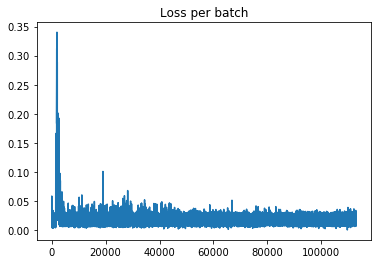

1021 sample validate on 256
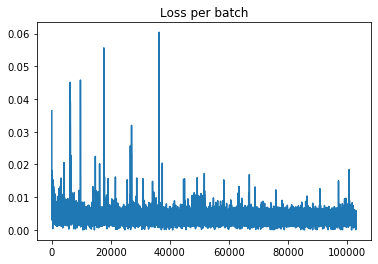

In [10]:
for i in range(len(test_X)):
    print('Test '+str(i))
    print('True shape: ' + str(test_Y[i]))
    print('Predicted shape: ' + str(model.predict(np.reshape(test_X[i], (1, 200))))+'\n')
    

Test 0
True shape: [0.2        0.17480641 0.1587209  0.14869921 0.14318419 0.14142136]
Predicted shape: [[0.09833518 0.10215363 0.1023652  0.10111508 0.10271542 0.09918966]]

Test 1
True shape: [0.49384417 0.5        0.4389726  0.4        0.4389726  0.5       ]
Predicted shape: [[0.47523662 0.47215676 0.45924208 0.4429709  0.43067187 0.42093578]]

Test 2
True shape: [0.39507534 0.4        0.35485183 0.32607652 0.30864787 0.3       ]
Predicted shape: [[0.31991267 0.33449268 0.34625506 0.3689741  0.38036034 0.34532884]]

Test 3
True shape: [0.47552826 0.48145578 0.5        0.5        0.49384417 0.5       ]
Predicted shape: [[0.47526106 0.47092906 0.47143123 0.44335935 0.430607   0.42395484]]

Test 4
True shape: [0.1        0.13169178 0.2        0.19507534 0.19507534 0.2       ]
Predicted shape: [[0.09027192 0.09437856 0.0943104  0.09369335 0.09453187 0.09038924]]

Test 5
True shape: [0.49384417 0.5        0.4539905  0.4253254  0.40955075 0.4045085 ]
Predicted shape: [[0.46458623 0.471905

Predicted shape: [[0.48677015 0.46702027 0.4336757  0.41958478 0.40852347 0.40238833]]

Test 76
True shape: [0.4        0.39507534 0.4        0.37474388 0.36084521 0.35640261]
Predicted shape: [[0.2217597  0.21930099 0.21772915 0.21100286 0.21701305 0.21851054]]

Test 77
True shape: [0.3        0.28887347 0.28531695 0.28887347 0.3        0.2       ]
Predicted shape: [[0.28413022 0.27508032 0.2685581  0.25606495 0.25122574 0.2516231 ]]



In [11]:
model.predict(np.reshape(test_X[1], (1, 200)))

array([[0.47523662, 0.47215676, 0.45924208, 0.4429709 , 0.43067187,
        0.42093578]], dtype=float32)

In [12]:
test_Y[1]

array([0.49384417, 0.5       , 0.4389726 , 0.4       , 0.4389726 ,
       0.5       ])

In [13]:
np.savetxt('Prediction/2019_7_15_1_p.txt', predict_Y[0])

NameError: name 'predict_Y' is not defined